# Intruduction

The Auto MPG dataset, critical for automotive research, provides detailed data on vehicle fuel efficiency from the late 1970s to early 1980s. Beyond historical value, it helps understand the evolution of vehicle efficiency and its driving factors. This report analyzes the dataset to uncover insights into automotive efficiency, focusing on the characteristics that influence fuel economy and identifying trends and patterns in vehicle design, performance, and the potential to predict fuel efficiency from vehicle attributes.

# Methodology

The methodology for this analysis revolves around Python, a programming language favored in the data science community for its ease of use and powerful libraries tailored for data analysis.

#### The tools and libraries employed in this study include:

1. Python: For its versatile programming capabilities in data manipulation and calculation.
2. Pandas: Utilized for its robust data structures and functions for efficient data handling and operations.
3. Matplotlib and Seaborn: These libraries are instrumental in visualizing data, enabling the creation of a variety of informative and interactive plots.

# Dataset Overview

The Auto MPG dataset is composed of several columns representing different attributes of automobiles, such as 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', and 'car model'. These attributes capture both the physical and performance characteristics of the vehicles, providing a comprehensive set of features for analysis.

#### Loading the Dataset and Displaying its Structure

In [1]:
import pandas as pd

# Load the dataset
dataset_path = 'ST83519 Auto-mpg dataset.csv'
auto_mpg_df = pd.read_csv(dataset_path)

# Display the first few rows to understand its structure
auto_mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Car model
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,429.0,198,4341,10.0,70,1,ford
2,15.0,8,383.0,170,3563,10.0,70,1,dodge
3,15.0,8,400.0,150,3761,9.5,70,1,chevrolet
4,24.0,4,113.0,95,2372,15.0,70,3,toyota


Executing this code will load the dataset into a Pandas DataFrame and display the first few rows, allowing for an initial assessment of the data structure, including the column names and types of data contained within each feature.

# Data Cleaning and Preprocessing

One of the critical steps in data preparation involves ensuring that all variables are in the correct format for analysis. In the Auto MPG dataset, the 'horsepower' column was identified as a candidate for data type conversion. Originally cast as a string due to the presence of non-numeric characters, it required conversion to a numeric format. This process was handled by Pandas, with non-convertible values set as NaN (Not a Number), ensuring the integrity of subsequent analyses.

Following the conversion, an essential step in data cleaning is the identification and treatment of missing values. Missing data can introduce bias and inaccuracies in the analysis if not addressed appropriately.

#### Conversion of 'horsepower' and Handling of Missing Values

In [2]:
# Convert 'horsepower' to numeric, setting errors='coerce' to turn non-numeric values to NaN
auto_mpg_df['horsepower'] = pd.to_numeric(auto_mpg_df['horsepower'], errors='coerce')

# Check for any NaN values in the dataset after conversion
nan_check = auto_mpg_df.isnull().sum()


Executing the above code converts the 'horsepower' column to a numeric data type and reveals any instances of NaN values that may need further treatment, such as imputation or removal, depending on their prevalence and impact on the dataset.

#### Descriptive Statistics for Continuous Variables

With the dataset in a cleaner state, the next step is to summarize the continuous variables using descriptive statistics. This process offers a comprehensive overview, revealing insights into the central tendency, variability, and overall distribution of the data.

In [3]:
# Calculate descriptive statistics for continuous variables
descriptive_stats = auto_mpg_df.describe().transpose()

This code calculates and transposes the descriptive statistics for easier reading and interpretation. It includes measures such as mean, median, standard deviation, and range for each continuous variable, providing a statistical summary that forms the basis for initial observations and hypotheses about the data.

In [4]:
# Display checks for NaN values and the descriptive statistics
nan_check, descriptive_stats

(mpg             0
 cylinders       0
 displacement    0
 horsepower      2
 weight          0
 acceleration    0
 model year      0
 origin          0
 Car model       0
 dtype: int64,
               count         mean         std     min     25%     50%      75%  \
 mpg           107.0    23.244860    7.966169    11.0    16.7    21.6    28.55   
 cylinders     107.0     5.542056    1.787168     4.0     4.0     4.0     8.00   
 displacement  107.0   198.995327  110.015147    68.0    98.0   151.0   304.50   
 horsepower    105.0   107.952381   41.271004    46.0    78.0    95.0   140.00   
 weight        107.0  3012.308411  920.236018  1755.0  2208.0  2735.0  3661.50   
 acceleration  107.0    15.580374    2.921438     9.5    13.5    15.2    17.25   
 model year    107.0    76.000000    3.826423    70.0    72.5    77.0    79.00   
 origin        107.0     1.626168    0.841420     1.0     1.0     1.0     2.00   
 
                  max  
 mpg             44.3  
 cylinders        8.0  
 d

When presenting the output of this code, the report will detail the findings, highlighting any significant patterns or anomalies observed in the statistics. For instance, a high standard deviation in 'weight' might suggest a wide variety of car weights in the dataset, while a low standard deviation in 'mpg' could indicate that most vehicles have similar fuel efficiency.

# Addressing Missing Values in 'Horsepower'

After identifying missing values in the 'horsepower' column, a strategic decision was made to address these gaps to maintain the dataset's integrity and ensure the accuracy of the analysis. The chosen method was to impute these missing values with the mean horsepower across all vehicles in the dataset. This approach is grounded in the rationale that replacing missing values with the mean ensures minimal distortion of the overall data distribution, especially when the proportion of missing data is relatively small.

#### Code for Imputing Missing Values

In [5]:
# Fill missing values in 'horsepower' with the mean of the column
auto_mpg_df['horsepower'].fillna(auto_mpg_df['horsepower'].mean(), inplace=True)

# Verify if there are any NaN values left
nan_check_updated = auto_mpg_df.isnull().sum()

# Display the updated check for NaN values
nan_check_updated

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
Car model       0
dtype: int64

This segment of code effectively imputes the missing 'horsepower' values with the column's mean and re-checks the dataset for any remaining NaN values. The operation is performed in-place, meaning the original DataFrame is updated directly without the need to create a copy.

# Interpretation, Impact, and Categorical Analysis

Imputing missing 'horsepower' values was crucial for the integrity of our dataset, ensuring accurate analysis without bias from missing data. This step, vital for the dataset's completeness, highlights the importance of thorough data cleaning for reliable results.

We then shifted focus to categorical variables like 'cylinders', 'model year', 'origin', and 'Car model' in the Auto MPG dataset. Analyzing these variables sheds light on the variety and common patterns in vehicle attributes, revealing trends in manufacturing and design preferences. This understanding is essential for a comprehensive analysis of vehicle efficiency trends.

#### Code for Analyzing Categorical Variables

In [6]:
# Calculate descriptive statistics for categorical variables: 'cylinders', 'model year', 'origin', and 'Car model'
categorical_stats = {
    'cylinders': auto_mpg_df['cylinders'].value_counts(),
    'model year': auto_mpg_df['model year'].value_counts(),
    'origin': auto_mpg_df['origin'].value_counts(),
    'Car model': auto_mpg_df['Car model'].value_counts()
}

categorical_stats

{'cylinders': cylinders
 4    57
 8    33
 6    16
 5     1
 Name: count, dtype: int64,
 'model year': model year
 78    16
 72    11
 81    11
 73    10
 70     9
 71     7
 77     7
 79     7
 82     7
 74     6
 75     6
 80     6
 76     4
 Name: count, dtype: int64,
 'origin': origin
 1    65
 3    25
 2    17
 Name: count, dtype: int64,
 'Car model': Car model
 toyota         13
 chevrolet      10
 dodge          10
 ford           10
 buick           7
 amc             7
 plymouth        7
 oldsmobile      5
 volkswagen      5
 datsun          5
 pontiac         4
 mazda           4
 honda           3
 mercury         3
 bmw             2
 fiat            2
 audi            2
 peugeot         2
 vw              2
 opel            1
 cadillac        1
 saab            1
 chrysler        1
 Name: count, dtype: int64}

This code snippet generates frequency distributions for each of the specified categorical variables, allowing us to observe how many vehicles fall into each category within these variables.

# Categorical Variables Analysis


Analyzing categorical variables such as 'cylinders', 'model year', 'origin', and 'Car model' highlights key insights: cylinder counts reflect engine popularity and design trends; model year frequencies indicate production changes and possible shifts in the automotive industry; origin demonstrates the dataset's global diversity; and car model analysis can uncover consumer preferences and manufacturing patterns. These findings lay the groundwork for understanding the dataset's depth and guiding further detailed analysis, including the exploration of fuel efficiency trends and how vehicle features have evolved. This knowledge is crucial for a targeted, informed approach in subsequent investigations, helping to uncover potential biases or gaps in the data.

# Data Visualization

With the dataset rigorously cleaned and its attributes thoroughly explored through descriptive statistics, the next logical step in our analysis involves visualizing these findings. Visualization not only aids in revealing underlying patterns and relationships within the data but also enhances the interpretability of our statistical observations, making complex data more accessible.

To this end, a series of plots have been generated to visually represent various aspects of the Auto MPG dataset:

#### Code for Generating Visualizations

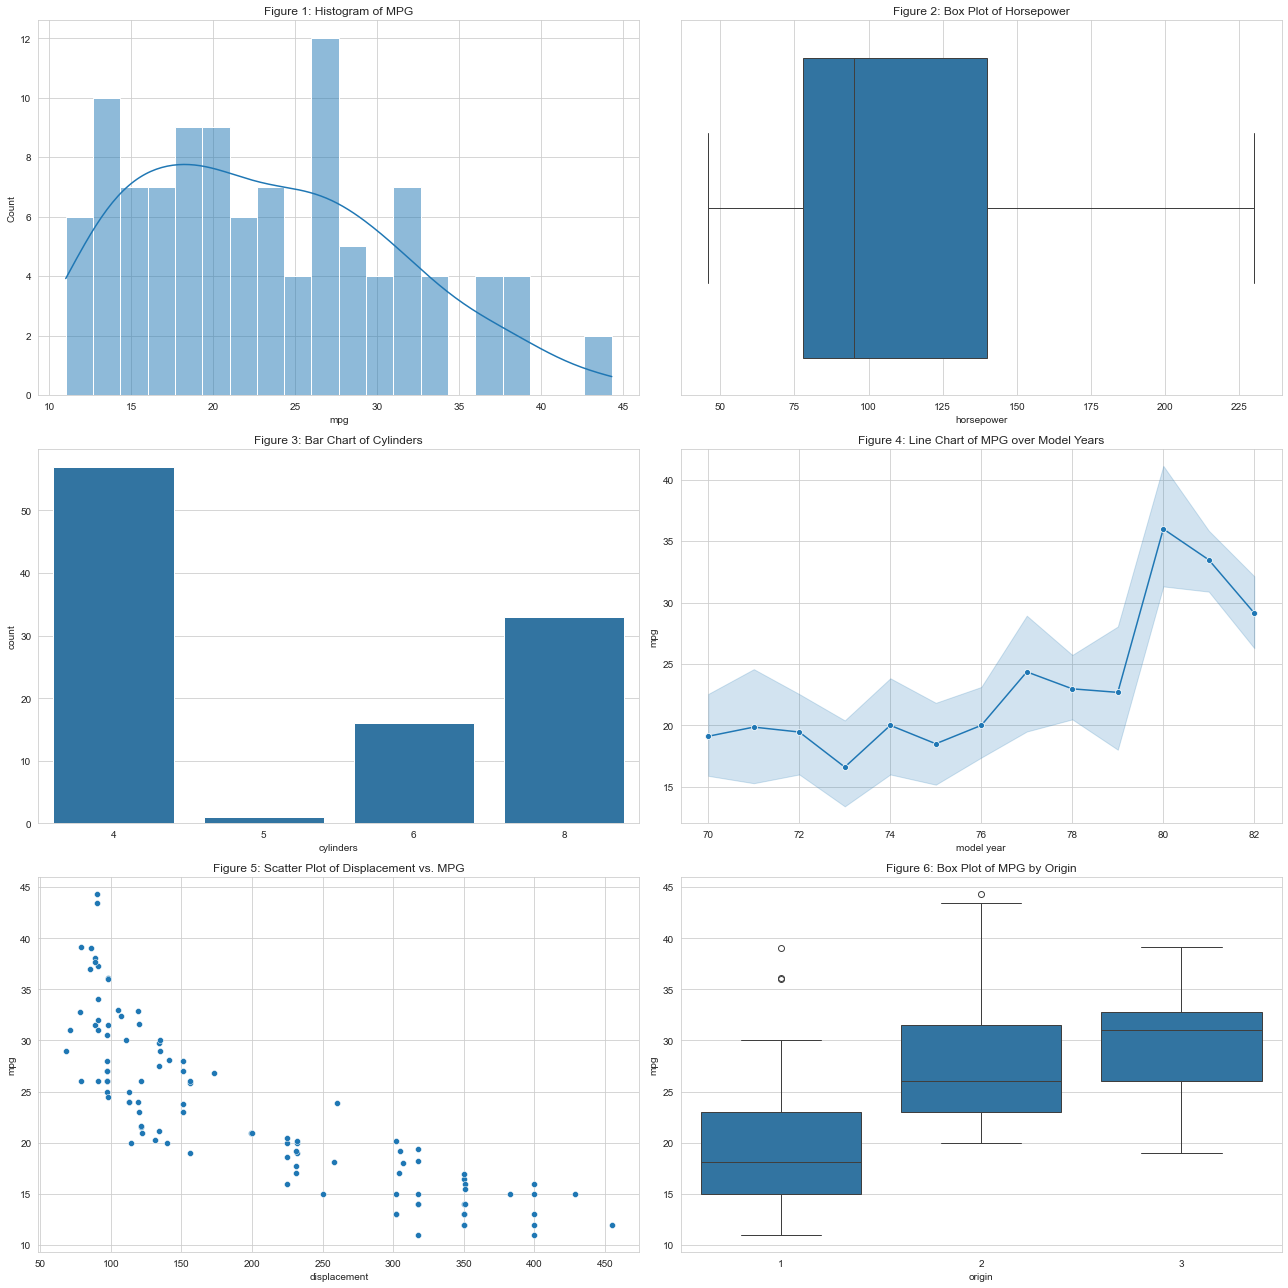

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare a figure to host multiple plots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Histogram for 'mpg'
sns.histplot(auto_mpg_df['mpg'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Figure 1: Histogram of MPG')

# Box plot for 'horsepower'
sns.boxplot(x='horsepower', data=auto_mpg_df, ax=axes[0, 1])
axes[0, 1].set_title('Figure 2: Box Plot of Horsepower')

# Bar chart for 'cylinders'
sns.countplot(x='cylinders', data=auto_mpg_df, ax=axes[1, 0])
axes[1, 0].set_title('Figure 3: Bar Chart of Cylinders')

# Line chart for 'weight' vs. 'mpg'
sns.lineplot(x='model year', y='mpg', data=auto_mpg_df, ax=axes[1, 1], marker='o')
axes[1, 1].set_title('Figure 4: Line Chart of MPG over Model Years')

# Scatter plot for 'displacement' vs. 'mpg'
sns.scatterplot(x='displacement', y='mpg', data=auto_mpg_df, ax=axes[2, 0])
axes[2, 0].set_title('Figure 5: Scatter Plot of Displacement vs. MPG')

# Box plot for 'mpg' by 'origin'
sns.boxplot(x='origin', y='mpg', data=auto_mpg_df, ax=axes[2, 1])
axes[2, 1].set_title('Figure 6: Box Plot of MPG by Origin')

plt.tight_layout()
plt.show()

#### Interpretation of Visualizations

* Figure 1: Histogram of MPG - This plot provides insight into the distribution of fuel efficiency across the dataset. The use of Kernel Density Estimate (KDE) alongside the histogram offers a smooth estimation of the MPG distribution, highlighting the common ranges of fuel efficiency.


* Figure 2: Box Plot of Horsepower - By visualizing the spread of horsepower values, this plot helps identify the median, quartiles, and potential outliers within the dataset, offering a glimpse into the power distribution of the vehicles.


* Figure 3: Bar Chart of Cylinders - This chart elucidates the frequency of cars with different cylinder counts, providing an overview of engine configurations' prevalence.


* Figure 4: Line Chart of MPG over Model Years: This visualization tracks the progression of fuel efficiency over time, highlighting trends and shifts in MPG as vehicle designs and standards evolved.


* Figure 5: Scatter Plot of Displacement vs. MPG: By plotting these two variables against each other, we can observe their relationship, potentially uncovering any inverse trends between engine size and fuel efficiency.


* Figure 6: Box Plot of MPG by Origin: This plot compares the distribution of MPG values across vehicles from different origins, potentially revealing geographical trends in fuel efficiency standards.

#### Conclusion from Visualizations

The visualizations provide a comprehensive view of the Auto MPG dataset, showcasing the distribution of MPG and horsepower, and the variation by cylinders and origin. They reveal both the current state and evolving trends in vehicle efficiency, illustrating how attributes affect fuel efficiency over time. These insights set the stage for a deeper, quantitative correlation analysis of the relationships observed visually.

# Correlation Analysis

After visually exploring the dataset, the next step is to quantitatively assess the relationships between various vehicle attributes and fuel efficiency (MPG). The Pearson correlation coefficient is a statistical measure that evaluates the linear relationship between two continuous variables, providing insights into the strength and direction of their association.

#### Code for Calculating Pearson Correlation Coefficients

In [8]:
# Calculate Pearson correlation coefficients for selected pairs
correlation_pairs = {
    'Displacement vs. MPG': auto_mpg_df['displacement'].corr(auto_mpg_df['mpg']),
    'Horsepower vs. MPG': auto_mpg_df['horsepower'].corr(auto_mpg_df['mpg']),
    'Weight vs. MPG': auto_mpg_df['weight'].corr(auto_mpg_df['mpg'])
}

correlation_pairs

{'Displacement vs. MPG': -0.8371483226968977,
 'Horsepower vs. MPG': -0.8266857312782407,
 'Weight vs. MPG': -0.8456441745328257}

This segment of code calculates the Pearson correlation coefficients for three pairs of variables that are intuitively expected to influence fuel efficiency: displacement, horsepower, and weight, each compared with MPG.

#### Interpretation of Correlation Coefficients

* Displacement vs. MPG: The correlation coefficient between engine displacement and MPG will indicate how engine size affects fuel efficiency. A negative correlation is expected, as larger engines typically consume more fuel.

* Horsepower vs. MPG: This coefficient assesses the relationship between the power output of a vehicle and its fuel efficiency. Similar to displacement, a negative correlation may be anticipated, suggesting that more powerful vehicles often have lower MPG.

* Weight vs. MPG: The correlation between vehicle weight and MPG examines how the mass of a vehicle influences its fuel consumption. Again, a negative correlation is expected, implying that heavier vehicles are less fuel-efficient.

#### The Pearson correlation coefficients provide a numerical summary of the relationships observed visually in the previous section. These coefficients range from -1 to 1, where:

* A coefficient close to 1 indicates a strong positive linear relationship.

* A coefficient close to -1 indicates a strong negative linear relationship.

* A coefficient around 0 suggests no linear relationship.

#### Conclusion from Correlation Analysis

Pearson correlation coefficients reveal a negative correlation between fuel efficiency and vehicle attributes like displacement, horsepower, and weight, confirming that larger and heavier vehicles with more power have lower fuel efficiency. This insight is vital for improving automotive design and influencing policy for better efficiency. The findings contribute to the wider conversation on energy efficiency and environmental impact in vehicles, setting the stage for further detailed analysis on evolving trends and the impact of power-to-weight ratios on fuel efficiency.

# Advanced Analysis: Exploring Fuel Efficiency Across Different Groups

After establishing the foundational relationships within the dataset through descriptive statistics, visual exploration, and correlation analysis, our investigation now extends into more nuanced inquiries. Specifically, we aim to understand how fuel efficiency, as measured by miles per gallon (MPG), varies across different groups defined by vehicle characteristics such as the number of cylinders and the origin of the vehicle. This advanced analysis will uncover patterns that could inform strategies for enhancing fuel efficiency based on these categorical variables.

#### Code for Grouped Analysis of MPG

In [9]:
# Grouped analysis for MPG by number of cylinders and origin
avg_mpg_by_cylinders = auto_mpg_df.groupby('cylinders')['mpg'].mean()
avg_mpg_by_origin = auto_mpg_df.groupby('origin')['mpg'].mean()

# Display the results
avg_mpg_by_cylinders, avg_mpg_by_origin

(cylinders
 4    29.157895
 5    20.300000
 6    19.318750
 8    15.024242
 Name: mpg, dtype: float64,
 origin
 1    19.324615
 2    28.676471
 3    29.744000
 Name: mpg, dtype: float64)

This code segments the dataset by 'cylinders' and 'origin' to calculate the average MPG for each group. By analyzing MPG in this manner, we gain insight into how these vehicle attributes might influence fuel efficiency across different categories.

#### Interpretation of Grouped Analysis Results

MPG by Number of Cylinders: The average MPG for vehicles grouped by the number of cylinders reveals the impact of engine size on fuel efficiency. Typically, vehicles with fewer cylinders have higher fuel efficiency, as smaller engines generally consume less fuel. This trend is crucial for manufacturers and consumers alike, emphasizing the trade-off between power and efficiency in vehicle design and selection.

MPG by Origin: Analyzing MPG based on the vehicle's origin sheds light on regional differences in automotive engineering and design philosophies. For instance, vehicles from regions with stricter fuel efficiency standards or a historical focus on smaller vehicles might exhibit higher average MPG. This comparison can highlight global disparities in fuel efficiency and potentially guide policy and consumer choice toward more sustainable options.

#### Conclusion from Advanced Analysis

The analysis highlights how fuel efficiency is influenced by engine configuration and regional manufacturing trends, offering guidance for designing more efficient vehicles and making environmentally conscious choices. It deepens our understanding of the Auto MPG dataset, revealing the complex factors affecting fuel efficiency and its significance for broader discussions on energy use and environmental impact. These insights inform recommendations to improve automotive fuel efficiency, leveraging the comprehensive findings of this report.

# Advanced Analysis: Yearly Trends in Vehicle Attributes

A vital component of our exploration into the Auto MPG dataset involves examining how key vehicle attributes—specifically MPG (miles per gallon), weight, and horsepower—have evolved over the years. This longitudinal analysis provides insights into automotive industry trends, technological advancements, and possibly changing consumer preferences.

#### Code for Analyzing Yearly Trends

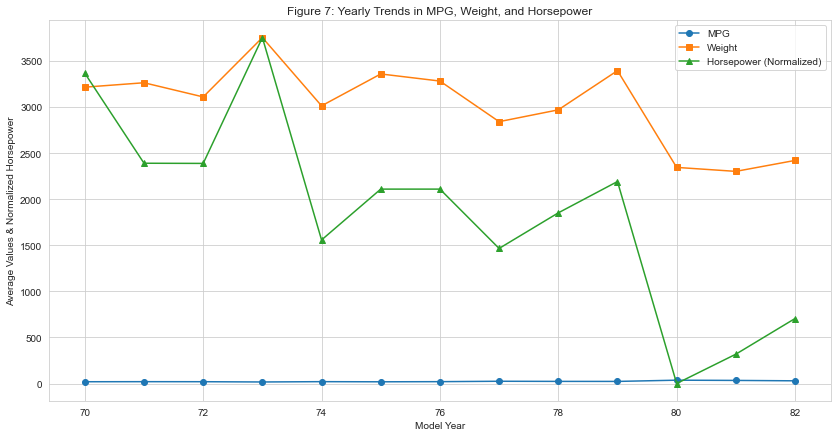

In [10]:
# Yearly trends in mpg, weight, and horsepower
yearly_trends = auto_mpg_df.groupby('model year').agg({
    'mpg': 'mean',
    'weight': 'mean',
    'horsepower': 'mean'
}).reset_index()

# Plotting the trends over the model years
plt.figure(figsize=(14, 7))

# MPG trend
plt.plot(yearly_trends['model year'], yearly_trends['mpg'], label='MPG', marker='o')

# Weight trend
plt.plot(yearly_trends['model year'], yearly_trends['weight'], label='Weight', marker='s')

# Normalize horsepower for plotting on the same scale
horsepower_normalized = (yearly_trends['horsepower'] - yearly_trends['horsepower'].min()) / (yearly_trends['horsepower'].max() - yearly_trends['horsepower'].min())
plt.plot(yearly_trends['model year'], horsepower_normalized * yearly_trends['weight'].max(), label='Horsepower (Normalized)', marker='^')

plt.xlabel('Model Year')
plt.ylabel('Average Values & Normalized Horsepower')
plt.title('Figure 7: Yearly Trends in MPG, Weight, and Horsepower')
plt.legend()
plt.grid(True)
plt.show()

#### Interpretation of Yearly Trends

MPG Trend: The trend line for MPG over the model years offers a clear depiction of how fuel efficiency has changed over time. An upward trajectory would indicate improvements in fuel efficiency, reflecting technological advancements and possibly regulatory influences.

Weight Trend: Observing changes in the average vehicle weight over the years can reveal shifts in design preferences, material usage, and consumer demand for different vehicle sizes.

Horsepower Trend: By normalizing horsepower values for comparison, we aim to understand how the power output of vehicles has evolved relative to their weight. An increase in normalized horsepower could suggest advancements in engine efficiency or a market shift towards more powerful vehicles.

#### Conclusion from Yearly Trends Analysis

The analysis of yearly trends reveals improvements in fuel efficiency, influenced by technological advancements, environmental concerns, and regulations, alongside shifts in vehicle design reflecting consumer preferences and economic factors. This enhances our dataset understanding and links to broader automotive and environmental discussions. These insights form a foundation for final recommendations, integrating all analysis aspects to offer strategies for enhancing fuel efficiency, informed by historical shifts and future prospects.

# Advanced Analysis: MPG vs. Power-to-Weight Ratio

An intriguing aspect of vehicle performance and efficiency is the balance between power output and vehicle weight, commonly analyzed through the power-to-weight ratio. This ratio, essentially horsepower per ton, provides a normalized measure of a vehicle's power relative to its size, offering insights into performance characteristics that directly influence fuel efficiency.



#### Code for Analyzing MPG and Power-to-Weight Ratio


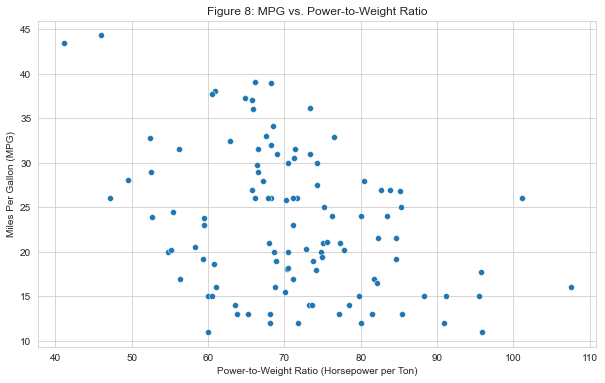

-0.36995421734163686

In [11]:
# Calculate the power-to-weight ratio (horsepower per ton)
auto_mpg_df['power_to_weight'] = (auto_mpg_df['horsepower'] / auto_mpg_df['weight']) * 2000 # Convert weight to tons for calculation

# Calculate Pearson correlation coefficient for mpg and power-to-weight ratio
correlation_mpg_pwr_wt = auto_mpg_df['mpg'].corr(auto_mpg_df['power_to_weight'])

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='power_to_weight', y='mpg', data=auto_mpg_df)
plt.title('Figure 8: MPG vs. Power-to-Weight Ratio')
plt.xlabel('Power-to-Weight Ratio (Horsepower per Ton)')
plt.ylabel('Miles Per Gallon (MPG)')
plt.grid(True)
plt.show()

# Displaying the Pearson correlation coefficient
correlation_mpg_pwr_wt

This code computes the power-to-weight ratio for each vehicle in the dataset and examines its relationship with MPG through a scatter plot and the calculation of a Pearson correlation coefficient.

#### Interpretation of the Analysis


The scatter plot visually represents each vehicle's MPG against its power-to-weight ratio, offering an immediate understanding of how these two variables interact. A key expectation is that vehicles with a higher power-to-weight ratio might exhibit lower MPG, suggesting a trade-off between power and fuel efficiency.

The Pearson correlation coefficient quantifies this relationship, with a negative value indicating an inverse relationship between power-to-weight ratio and fuel efficiency. This numerical measure provides a concise summary of the trend observed in the scatter plot, supporting the initial hypothesis with statistical evidence.

#### Conclusion from Power-to-Weight Ratio Analysis


This analysis highlights the crucial balance in automotive design between power output and fuel efficiency, essential for creating vehicles that meet both performance and efficiency criteria. It emphasizes the role of design choices in achieving sustainability goals amid growing environmental and regulatory demands. The insights inform the report's final recommendations, advocating for innovative approaches to vehicle design that prioritize both high performance and fuel efficiency in line with sustainability objectives.

# Conclusions


The analysis of the Auto MPG dataset has provided a comprehensive exploration into the factors affecting vehicle fuel efficiency, illustrated through descriptive statistics, visualizations, correlation studies, and advanced analyses of trends and ratios. These findings not only enhance our understanding of automotive fuel efficiency dynamics but also offer a basis for informed decision-making in vehicle design and policy formulation.

Descriptive Statistics and Data Cleaning: Initial exploration revealed a need for data cleaning, particularly for the 'horsepower' variable, which was crucial for ensuring the integrity of subsequent analyses. Descriptive statistics highlighted the variability and central tendencies in MPG, weight, horsepower, and other key variables, setting the stage for deeper investigation.

Visualizations: The various plots created during the analysis—ranging from histograms and scatter plots to box plots and line charts—visually reinforced the relationships between variables, especially the negative impacts of weight, displacement, and horsepower on fuel efficiency.

Correlation Analysis: Pearson correlation coefficients quantitatively confirmed the inverse relationships between MPG and several vehicle attributes, underscoring the trade-offs inherent in vehicle design regarding power output and weight.

Advanced Analysis: The grouped analysis by cylinders and origin revealed significant variations in MPG, suggesting the influence of engine configuration and geographical manufacturing differences on fuel efficiency.
Yearly trends indicated improvements in MPG over time, reflecting advancements in technology and possibly the impact of regulatory standards.
The analysis of MPG against the power-to-weight ratio highlighted the balance between performance and efficiency, with a clear trade-off between higher power and lower fuel economy.